Now we will try to solve our existing problem of circule fn approximation using 2 layer nn

First we need a two layer nn

In [13]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.optim as optim



In [15]:

def generate_circle_band_dataset(n_points=500, inner_radius=0.7, outer_radius=1.2, seed=42):
    """
    Generate dataset of points (x1, x2) labeled 1 if they lie within a circular ring (inner_radius < r < outer_radius),
    else labeled 0.
    
    Returns:
        X: shape (2, n_points) — feature matrix
        y: shape (1, n_points) — labels
    """
    rng = np.random.default_rng(seed)
    
    X = rng.uniform(low=-1.5*outer_radius, high=1.5*outer_radius, size=(2, n_points))  # shape (2, n_points)
    r = np.sqrt(X[0]**2 + X[1]**2)
    y = ((r > inner_radius) & (r < outer_radius)).astype(int)
    
    return X.T, y.reshape(-1,1)


In [16]:
X, y = generate_circle_band_dataset(n_points=10000, inner_radius=5, outer_radius=10, seed=42)

# Convert to float32 (PyTorch expects float32 not float64)
X = X.astype(np.float32)
y = y.astype(np.float32)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PyTorch models only work with tensors, not NumPy arrays.

In [17]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)

X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)


Lets define model

In [18]:

model = nn.Sequential(
    nn.Linear(2,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Sigmoid()
)

# Define the loss func
loss_fn = nn.BCELoss()

# Define the optimizer which is going to update wts 
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train(X_train_tensor,y_train_tensor,epochs=10):
    for i in range(epochs):
        # Reset the gradients
        optimizer.zero_grad()
        # Calc output
        output= model(X_train_tensor)
        # Calc loss
        loss= loss_fn(output,y_train_tensor)
        print(f"Loss in epoch {i+1} is {loss}")
        # do backpropagation
        loss.backward()
        # update the wts 
        optimizer.step()

train(X_train_tensor,y_train_tensor,100000)


Loss in epoch 1 is 0.7399187684059143
Loss in epoch 2 is 0.7149003148078918
Loss in epoch 3 is 0.6969517469406128
Loss in epoch 4 is 0.684617280960083
Loss in epoch 5 is 0.6739283204078674
Loss in epoch 6 is 0.6650053262710571
Loss in epoch 7 is 0.6574527025222778
Loss in epoch 8 is 0.6504094004631042
Loss in epoch 9 is 0.643476665019989
Loss in epoch 10 is 0.6361089944839478
Loss in epoch 11 is 0.6282519698143005
Loss in epoch 12 is 0.619961678981781
Loss in epoch 13 is 0.6112771034240723
Loss in epoch 14 is 0.6025840044021606
Loss in epoch 15 is 0.594100832939148
Loss in epoch 16 is 0.58577561378479
Loss in epoch 17 is 0.5776427388191223
Loss in epoch 18 is 0.5697641372680664
Loss in epoch 19 is 0.5620706677436829
Loss in epoch 20 is 0.554486095905304
Loss in epoch 21 is 0.5471672415733337
Loss in epoch 22 is 0.5403002500534058
Loss in epoch 23 is 0.5337607264518738
Loss in epoch 24 is 0.5275387167930603
Loss in epoch 25 is 0.5218177437782288
Loss in epoch 26 is 0.5168073773384094
Lo

In [19]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    model.eval()
    
    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        preds = model(grid_tensor).numpy().reshape(xx.shape)
    
    # Plot contour
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, preds >= 0.5, levels=1, alpha=0.2, cmap=plt.cm.RdBu)
    plt.contour(xx, yy, preds, levels=[0.5], colors='black', linewidths=1)

    # Scatter actual data
    y = y.reshape(-1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=20)
    
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


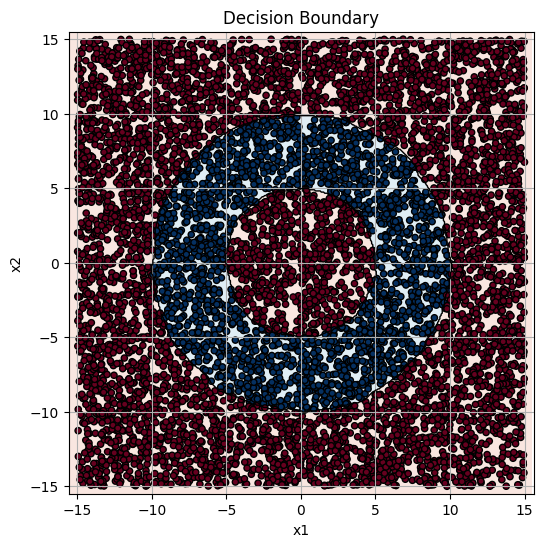

In [20]:
plot_decision_boundary(model, X_train, y_train_tensor.numpy())
